# Correlação entre 2 variáveis com 'tabela de contingência' & 'qui-quadrado'
fonte: [Link](https://github.com/ipython-books/cookbook-2nd-code)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

In [5]:
df.describe()

,year,atp ranking,time,player1 aces,player1 double faults,player1 1st serves in,player1 1st serves total,player1 1st serve points won,player1 1st serve points total,player1 2nd serve points won,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
count,1179.000000,1177.000000,1179.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,2005.822731,15.402719,88.014419,7.658228,1.972736,48.074976,78.050633,36.891918,48.074976,16.935735,...,29.975657,1.515093,4.582278,12.798442,49.671860,82.675755,24.245375,78.050633,73.917235,160.726388
std,3.893527,61.331354,50.208925,4.791261,1.927344,17.828652,28.282779,13.340020,17.828652,6.512229,...,12.366416,1.666818,4.072658,4.167927,20.230553,29.701783,12.214704,28.282779,30.274990,56.441072
min,1998.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,2.000000,3.000000,2.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,9.000000,1.000000,5.000000,2.000000,14.000000
25%,2003.000000,1.000000,63.000000,4.000000,1.000000,35.500000,57.000000,27.000000,35.500000,12.000000,...,21.000000,0.000000,1.000000,10.000000,35.000000,61.000000,15.000000,57.000000,51.000000,118.000000
50%,2006.000000,2.000000,86.000000,7.000000,1.000000,45.000000,73.000000,35.000000,45.000000,16.000000,...,27.000000,1.000000,4.000000,12.000000,46.000000,78.000000,22.000000,73.000000,68.000000,150.000000
75%,2009.000000,6.000000,116.000000,10.000000,3.000000,57.000000,93.000000,44.000000,57.000000,21.000000,...,37.000000,2.000000,7.000000,15.000000,61.500000,99.000000,31.000000,93.000000,92.000000,191.500000
max,2012.000000,878.000000,305.000000,50.000000,12.000000,127.000000,197.000000,113.000000,127.000000,48.000000,...,88.000000,11.000000,26.000000,37.000000,171.000000,239.000000,86.000000,197.000000,213.000000,436.000000


In [4]:
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


In [7]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

(0.0, 0.1629310344827586)

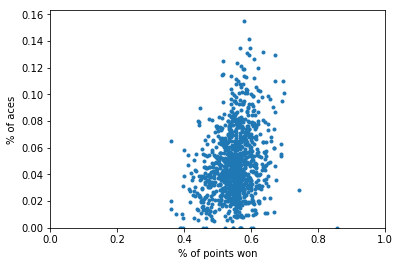

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

In [9]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()

,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [10]:
df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [11]:
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

In [12]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


In [13]:
st.chi2_contingency(_)

(27.809858855369555,
 1.338423379963363e-07,
 1,
 array([[257.25024343, 256.74975657],
        [256.74975657, 256.25024343]]))